## Customer Support Q&A Chatbot

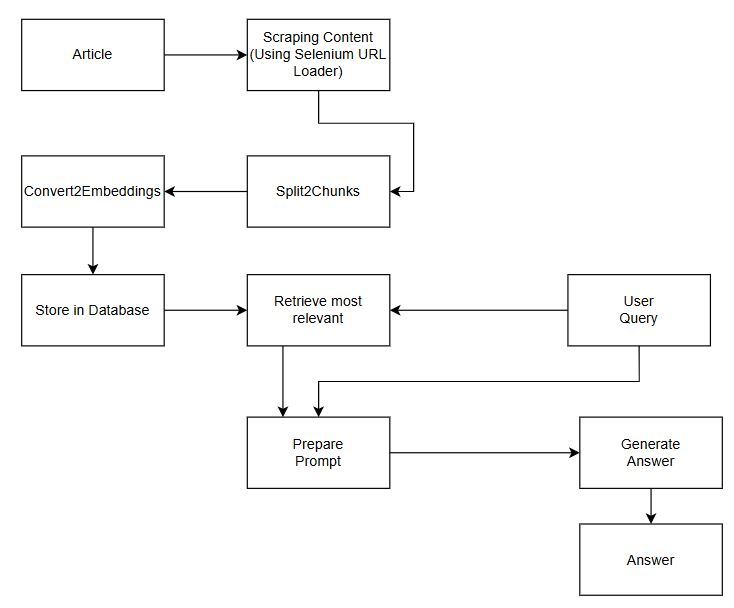

In [1]:
from IPython.display import Image
Image(filename='customer_support_qa_chatbot.JPG',width=800, height=400)

In [10]:
from langchain_openai.embeddings.base import OpenAIEmbeddings
from langchain_text_splitters.character import CharacterTextSplitter
from langchain_openai import OpenAI
from langchain_community.document_loaders.url_selenium import SeleniumURLLoader
from langchain_core.prompts.prompt import PromptTemplate

In [11]:
urls = ['https://beebom.com/what-is-nft-explained/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-download-gif-twitter/',
        'https://beebom.com/how-use-chatgpt-linux-terminal/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-save-instagram-story-with-music/',
        'https://beebom.com/how-install-pip-windows/',
        'https://beebom.com/how-check-disk-usage-linux/']

In [19]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
# use the selenium scraper to load the documents
loader = SeleniumURLLoader(urls=urls)
docs_not_splitted = loader.load()

# we split the documents into smaller chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(docs_not_splitted)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [20]:
docs

[Document(metadata={'source': 'https://beebom.com/what-is-nft-explained/', 'title': 'NFTs Explained: What is an NFT and What is Its Use | Beebom', 'description': 'Wondering what is non fungible token? We have explained NFTs, and tell you how you can buy, make and sell your own NFTs easily.', 'language': 'en-US'}, page_content='Home > Internet > NFTs Explained: What is an NFT and What is Its Use\n\nNFTs Explained: What is an NFT and What is Its Use\n\nArjun Sha\n\nComments\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t2\n\nShare\n\nCopied\n\nAfter Bitcoin and Blockchain, NFT is another word to have entered our lexicon. The buzzword is everywhere and people are wondering what is NFT and what is its use? Well, there is not really a one-line explainer. And that’s why we have brought a comprehensive explainer on NFT, what is its use in digital art, and more. So without wasting any time, let’s go ahead and learn about NFTs (Non-fungible Token) in complete detail.\n\nWhat is NFT: A Definitiv

In [ ]:
from langchain_community.vectorstores.faiss import FAISS

# Assuming `texts` is a list of chunks
texts = docs

# Generate embeddings
embeddings = OpenAIEmbeddings()
faiss_index = FAISS.from_texts(texts, embeddings)

# Save FAISS index locally
faiss_index.save_local("faiss_index")

# Load FAISS index locally
new_faiss_index = FAISS.load_local("faiss_index", embeddings)


In [15]:
!pip install unstructured

  Using cached unstructured-0.11.8-py3-none-any.whl.metadata (26 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached emoji-2.14.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached python_iso639-2024.10.22-py3-none-any.whl.metadata (13 kB)
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached rapidfuzz-3.9.7-cp38-cp38-win_amd64.whl.metadata (12 kB)
  Using cached unstructured_client-0.28.1-py3-none-any.whl.metadata (20 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached cryptography-44.0.0-cp37-abi3-win_amd64.whl.metadata (5.7 kB)
  Using cached eval_type_backport-0.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonpath_python-1.0.6-py3-none-any.whl.metadata (12 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached pydantic_core-2.23.4-cp38-none-win_amd64.whl.metadata (6.7 kB)
Using cached unstructured-0.

  You can safely remove it manually.
